In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [301]:
df_train = pd.read_csv('./data/titanic/train.csv')
df_test = pd.read_csv('./data/titanic/test.csv')

In [302]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] +1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] +1

# Fare

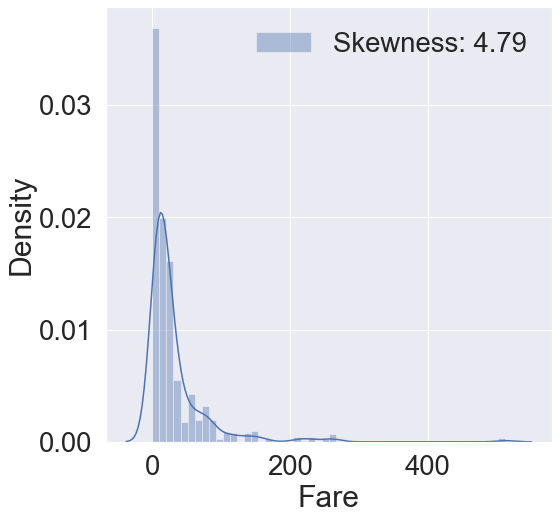

In [303]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')
# distplot : 시리즈의 데이터그램
# Skewness : 왜도 - 히스토그램이 얼마나 쏠렸냐
# Skewness가 양수이기에 좌측으로 치우쳐짐 - 이 데이터로 학습시 좋은 모델 x

In [304]:
# 로그적용하기!
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
# 소위 말하는 Feature Engineering : 모델 성능을 좋하기 위해 Feature 수정

In [305]:
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)

In [306]:
x = lambda i : i*i
x(3)

9

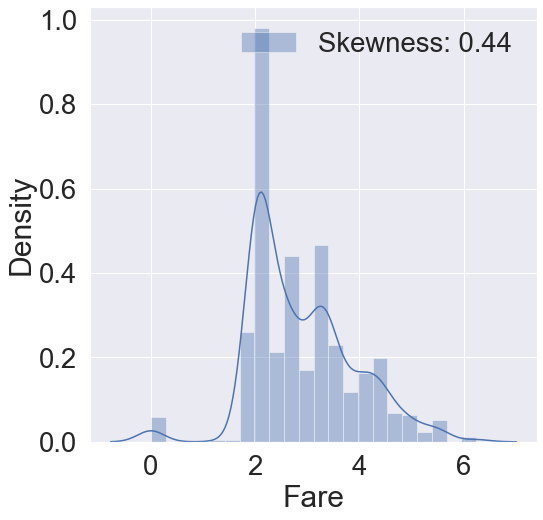

In [307]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

# Cabin
- null 데이터가 80프로이므로 분석에서 제외

# Ticket

In [308]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

# Feature engineering - Fill Null in Age

In [309]:
df_train['Age'].isnull().sum()

177

In [310]:
df_train['Name']
df_train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [311]:
df_train['Name'].str.extract('([A-Za-z]+)\.')

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [312]:
df_train['initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

In [313]:
pd.crosstab(df_train['initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [314]:
df_train['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],
                           inplace = True)

df_test['initial'].replace(['Mile','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],
                           inplace = True)

In [315]:
df_train.groupby('initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<AxesSubplot:xlabel='initial'>

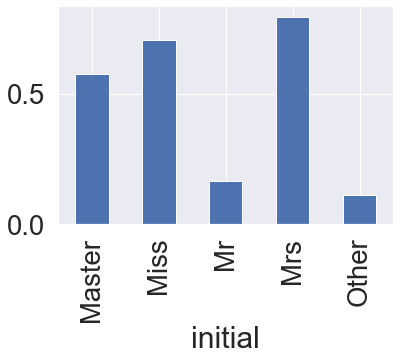

In [316]:
df_train.groupby('initial')['Survived'].mean().plot.bar()

In [317]:
df_all = pd.concat([df_train,df_test])
# concat : 쌓는다. A라는 데이터 프레임 밑에 B 데이터 프레임을 쌓는다
# merge : 같은 컬럼이 있을 때 그 컬럼을 기준으로 합친다
df_all.reset_index(drop=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,initial
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,2.085672,NaN,S,1,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,4.690430,C105,C,1,Mr
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,1.981001,NaN,S,1,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,2.085672,NaN,S,1,Mr


In [318]:
df_all.groupby('initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
initial,,,,,,,,
Master,658.852459,0.575000,2.655738,5.482642,2.049180,1.377049,3.262225,4.426230
Miss,616.992453,0.704301,2.332075,21.834533,0.652830,0.494340,3.065227,2.147170
Mr,658.831388,0.162571,2.359274,32.556397,0.286641,0.159533,2.676067,1.446174
Mrs,685.673367,0.795276,1.929648,37.034884,0.658291,0.824121,3.488188,2.482412
Other,714.923077,0.111111,1.615385,44.923077,0.230769,0.153846,2.951897,1.384615


In [319]:
(df_train['Age'].isnull()) &(df_train['initial'] =='Mr')

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [320]:
df_train.loc[(df_train['Age'].isnull()) &(df_train['initial'] =='Mr'),'Age'] = 33
df_train.loc[(df_train['Age'].isnull()) &(df_train['initial'] =='Mrs'),'Age'] = 37
df_train.loc[(df_train['Age'].isnull()) &(df_train['initial'] =='Master'),'Age'] = 5
df_train.loc[(df_train['Age'].isnull()) &(df_train['initial'] =='Miss'),'Age'] = 22
df_train.loc[(df_train['Age'].isnull()) &(df_train['initial'] =='Other'),'Age'] = 45

df_test.loc[(df_test['Age'].isnull()) &(df_test['initial'] =='Mr'),'Age'] = 33
df_test.loc[(df_test['Age'].isnull()) &(df_test['initial'] =='Mrs'),'Age'] = 37
df_test.loc[(df_test['Age'].isnull()) &(df_test['initial'] =='Master'),'Age'] = 5
df_test.loc[(df_test['Age'].isnull()) &(df_test['initial'] =='Miss'),'Age'] = 22
df_test.loc[(df_test['Age'].isnull()) &(df_test['initial'] =='Other'),'Age'] = 45

In [321]:
df_train['Age'].isnull().sum()
df_test['Age'].isnull().sum()

0

# Fill Null in Embarked and categorize Age

In [322]:
df_train['Embarked'].isnull().sum()

2

In [323]:
df_train.shape

(891, 14)

In [324]:
df_train['Embarked'].fillna('S', inplace=True)

In [325]:
df_train['Embarked'].isnull().sum()

0

In [326]:
df_train['Age_cat']=0

In [327]:
df_train.loc[df_train['Age']<10, 'Age_cat'] = 0
df_train.loc[(10<=df_train['Age']) & (df_train['Age']<20), 'Age_cat'] =1
df_train.loc[(20<=df_train['Age']) & (df_train['Age']<30), 'Age_cat'] =2
df_train.loc[(30<=df_train['Age']) & (df_train['Age']<40), 'Age_cat'] =3
df_train.loc[(40<=df_train['Age']) & (df_train['Age']<50), 'Age_cat'] =4
df_train.loc[(50<=df_train['Age']) & (df_train['Age']<60), 'Age_cat'] =5
df_train.loc[(60<=df_train['Age']) & (df_train['Age']<70), 'Age_cat'] =6
df_train.loc[(70<=df_train['Age']) , 'Age_cat'] =7

In [328]:
df_test.loc[df_test['Age']<10, 'Age_cat'] = 0
df_test.loc[(10<=df_test['Age']) & (df_test['Age']<20), 'Age_cat'] =1
df_test.loc[(20<=df_test['Age']) & (df_test['Age']<30), 'Age_cat'] =2
df_test.loc[(30<=df_test['Age']) & (df_test['Age']<40), 'Age_cat'] =3
df_test.loc[(40<=df_test['Age']) & (df_test['Age']<50), 'Age_cat'] =4
df_test.loc[(50<=df_test['Age']) & (df_test['Age']<60), 'Age_cat'] =5
df_test.loc[(60<=df_test['Age']) & (df_test['Age']<70), 'Age_cat'] =6
df_test.loc[(70<=df_test['Age']) , 'Age_cat'] =7

In [329]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3


In [330]:
def categroy_age(x):
    if x<10:
        return 0
    elif x<20:
        return 1
    elif x<30:
        return 2
    elif x<40:
        return 3
    elif x<50:
        return 4
    elif x<60:
        return 5
    elif x<70:
        return 6
    else:
        return 7

In [331]:
df_train['Age_cat_2'] = df_train['Age'].apply(categroy_age)

In [332]:
(df_train['Age_cat'] == df_train['Age_cat_2']).all()
# all() : 모든게 True이면 True, 하나라도 False면 False
# any() : 하나라도 True면 True, True가 하나도 없으면 False

True

In [333]:
df_train.drop(['Age','Age_cat_2'], axis=1,inplace=True)
df_test.drop(['Age'], axis=1,inplace=True)

# Change string to categorical and Pearson coefficient

In [334]:
df_train.initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [335]:
df_train['initial'] = df_train['initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_test['initial'] = df_test['initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

In [336]:
# 특정 feature에 어떤 값들이 있는 지 확인 방법
# 1. 반환 numpy.ndarray
df_train.Embarked.unique()
# 2.갯수까지, 반환 Series
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [337]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})


In [338]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,2,1,2,3


In [339]:
df_train.Embarked.isnull().any()
df_train.Embarked.isnull().sum()

0

In [340]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [341]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})


In [342]:
# Feature 들의 상관관계 - Pearson coefficient - 선형
# 1 이면 양의 상관관계 , -1 음의 상관관계 (반비례)
heatmap_data = df_train[['Survived','Pclass','Sex','Fare','Embarked','FamilySize','initial','Age_cat']]

<AxesSubplot:title={'center':'Pearson Correalation of Features'}>

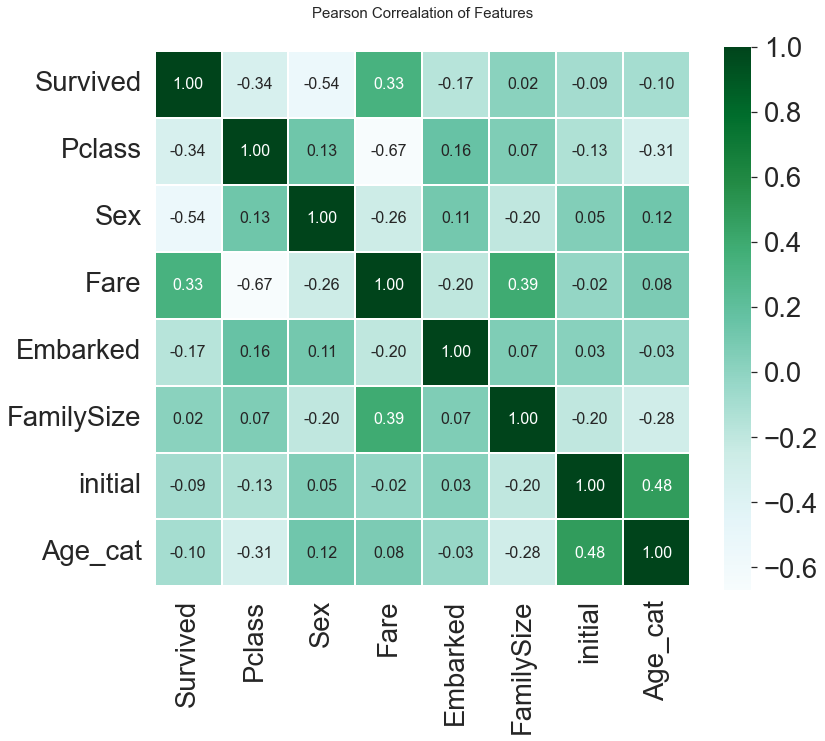

In [343]:
colormap = plt.cm.BuGn
plt.figure(figsize=(12,10))
plt.title('Pearson Correalation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1,vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':16}, fmt = '.2f')
# annot : 어노테이션, 숫자출력

- 만약 1의 상관관계를 가지고 있다면 하나의 데이터셋으로 충분하다 - redent? 하다?
- pclass와 fare의 상관관계가 1이라면 둘 중에 하나만 있어도 상관없다!

# Feature enginerring - One hot encoding on the Initial and Embarked다.
- 수치화시킨 카테고리 데이터를 그대로 넣어도 되지만, 모델의 성능을 높이기 위해 one-hot encoding을 해줄 수 있습니다.
- 수치화는 간단히 Master==0, Mis==1, Mr==2, Mrs==3, Other==4 로 매핑해주는 것을 말합니다.
- 원핫인코딩은 질문이 간단화되고 정보들이 들어나게 된다.

In [344]:
df_train = pd.get_dummies(df_train, columns=['initial'], prefix='initial')
df_test = pd.get_dummies(df_test, columns=['initial'], prefix='initial')

In [345]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [346]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], axis=1, inplace=True)

In [347]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,initial_0,initial_1,initial_2,initial_3,initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [348]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,initial_0,initial_1,initial_2,initial_3,initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3.0,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4.0,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6.0,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2.0,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2.0,0,0,0,1,0,0,0,1


# Model development - Machine learinig(Randomforest)

In [349]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [350]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [351]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

In [352]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)

RandomForestClassifier()

In [353]:
prediction = model.predict(X_vld)

In [354]:
print('총 {}명 중 {:.2f}% 정확도로 생존 맞춤'.format(y_vld.shape[0], 100*metrics.accuracy_score(prediction,y_vld)))

총 268명 중 82.84% 정확도로 생존 맞춤


# feature importance and prediction on test set
- 학습된 모델은 feature importance 를 가지게 되는데, 우리는 이것을 확인하여 지금 만든 모델이 어떤 feature에 영향을 많이 받았는 지 확인 가능

In [355]:
model.feature_importances_

array([0.10111162, 0.10452813, 0.32421394, 0.09387674, 0.12697405,
       0.01125494, 0.04646677, 0.11410432, 0.03095677, 0.0046019 ,
       0.01224626, 0.01108265, 0.01858192])

In [356]:
from pandas import Series

In [357]:
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

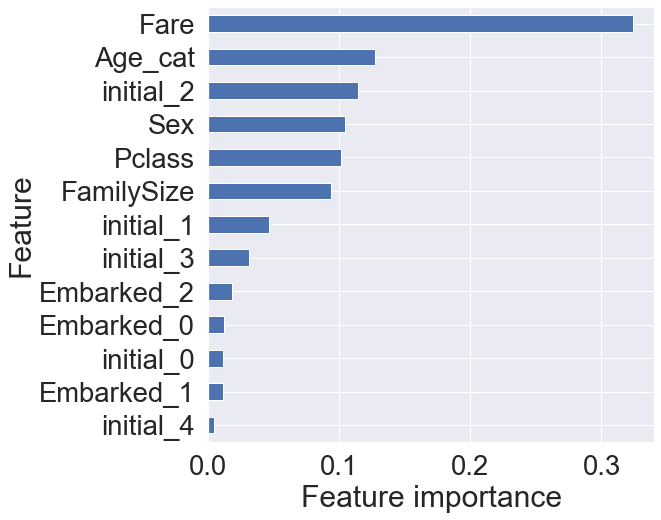

In [358]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [359]:
submission = pd.read_csv('./data/titanic/gender_submission.csv')

In [360]:
prediction = model.predict(X_test)

In [362]:
submission['Survived'] = prediction

In [364]:
submission.to_csv("./my_first_submission.csv", index=False)